# Embedding in $d=2$ (two patterns)

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib.pyplot as plt, matplotlib.animation as animation, matplotlib.tri as tri
import numpy as np
from tqdm import tqdm
from scipy import stats
from neurodyn import *
from utils import *

In [10]:
F, G = make_F_G_valentin(p=2, N=100_000, phi=sigmoid)
phi = sigmoid
I_ext = lambda t: 0

In [11]:
rnn = LowRankRNN(F, G, phi, I_ext)

## Test for stationary points

With p=2, the distribution is a lot more wide

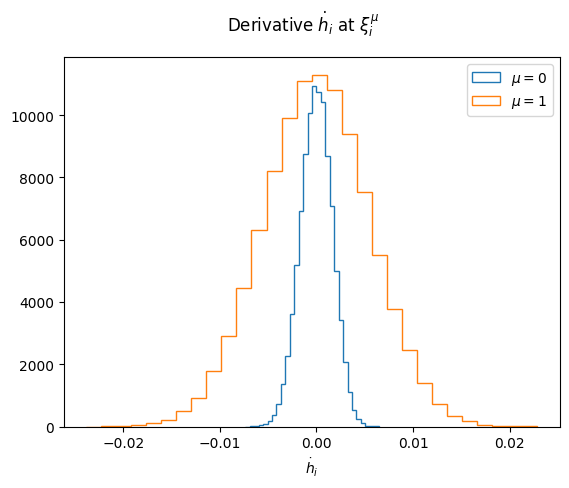

In [5]:
plot_dh_hist(rnn);

## Run simulations and overlap

simulation time: 100.00%|██████████| t=40.000 of 40 [00:07<00:00]


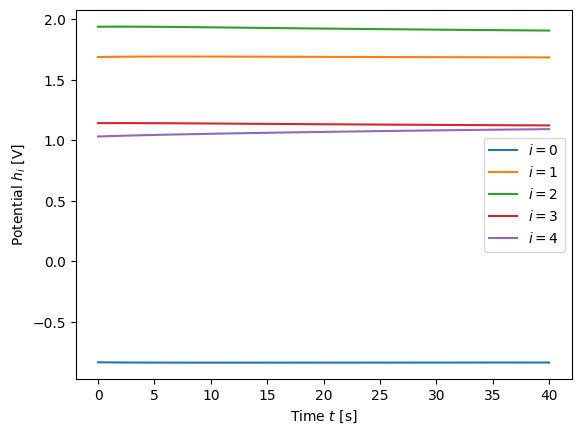

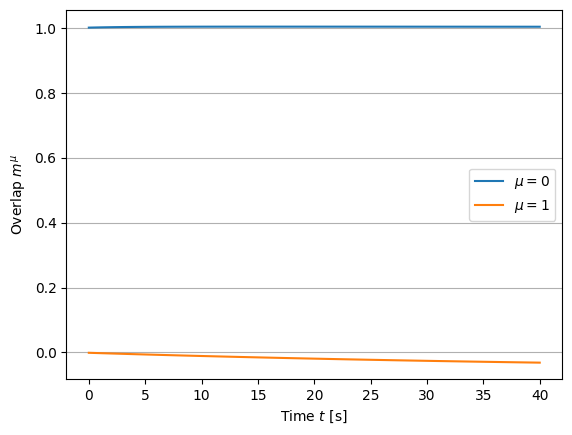

In [9]:
# all neurons in pattern 0
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:09<00:00]


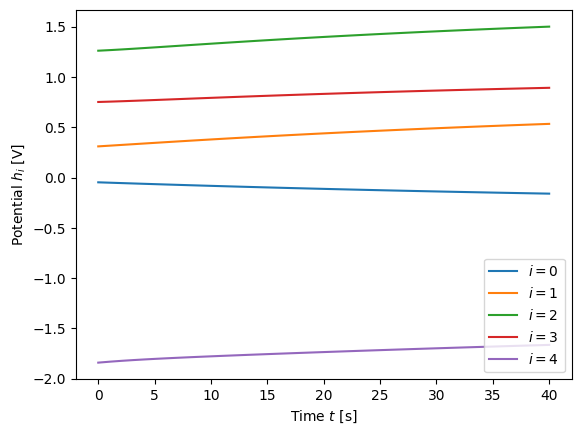

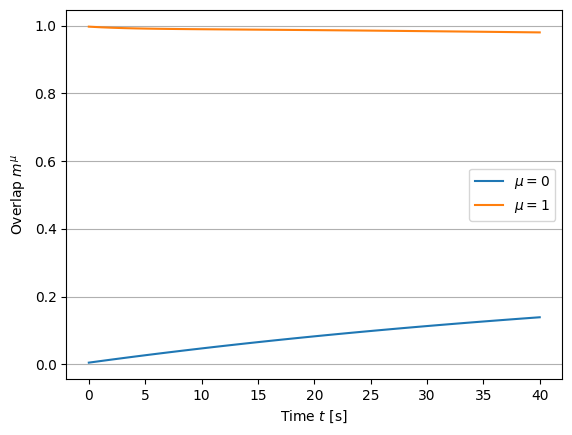

In [8]:
# all neurons in pattern 1
res = rnn.simulate_h(rnn.F[:, 1], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=120.000 of 120 [00:12<00:00]


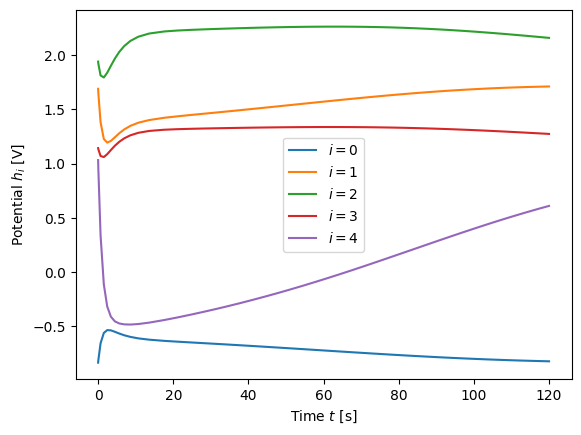

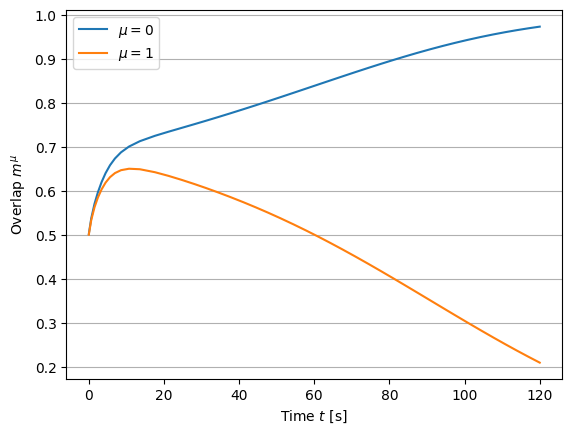

In [ ]:
# half neurons in pattern 0, half neurons in pattern 1
res = rnn.simulate_h(np.concatenate([rnn.F[:rnn.N//2, 0], rnn.F[rnn.N//2:, 1]]), (0, 120), dt_max=5, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);
# hypothesis : mu = 0 "wins" because its dh(xi) histogram is a lot tighter

simulation time: 100.00%|██████████| t=40.000 of 40 [00:11<00:00]


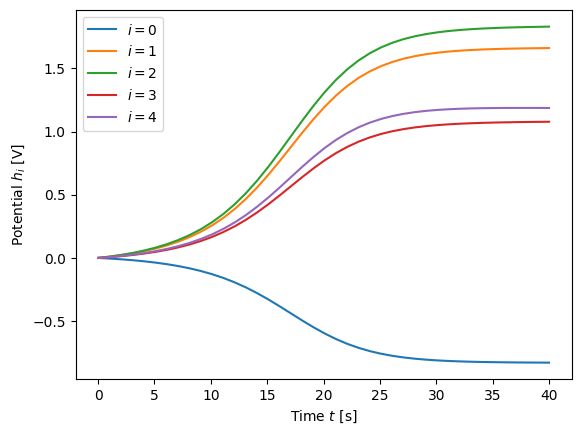

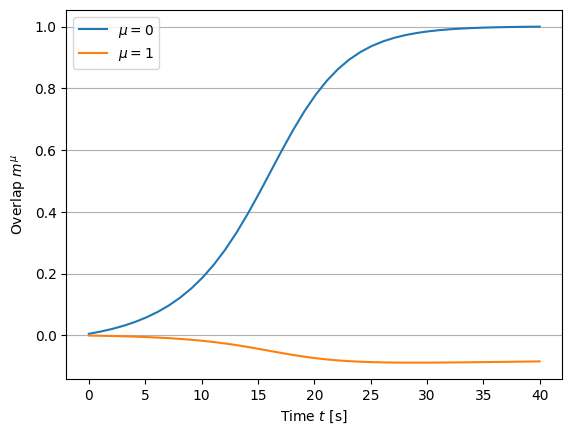

In [22]:
# starting from 0
res = rnn.simulate_h(np.zeros(rnn.N), (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

## Plot 2D embedding

### verify $\xi$ distribution

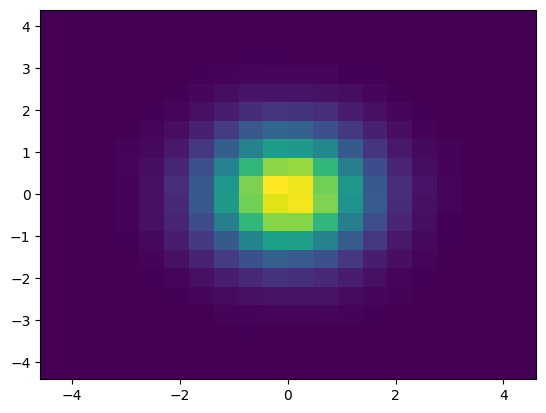

In [73]:
# quickly verify distribution of xi
plt.hist2d(rnn.F[:, 0], rnn.F[:, 1], bins=20);

### 3d plot prototypes

In [29]:
rnn = LowRankRNN(F, G, phi, I_ext)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)

simulation time: 100.00%|██████████| t=40.000 of 40 [00:06<00:00]


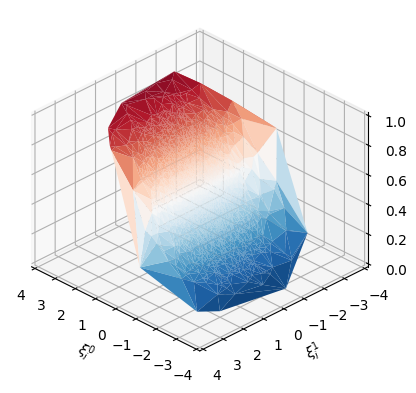

In [30]:
# trisurf attempt

t = 40
activity = phi(res.y)

plt.close('all')
ax = plt.figure().add_subplot(projection='3d')
ax.set_proj_type('ortho')

Nmax = 2000

# trisurf has this annoying transparency artefact...
surf = ax.plot_trisurf(rnn.F[:Nmax, 0], rnn.F[:Nmax, 1], activity[:Nmax, t], alpha=1, cmap='RdBu_r', vmin=0, vmax=1)
# cbar = fig.colorbar(surf, ax=ax, pad=0.15)

ax.set_zlim((0, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
ax.view_init(azim=180-45)

plt.show(fig)

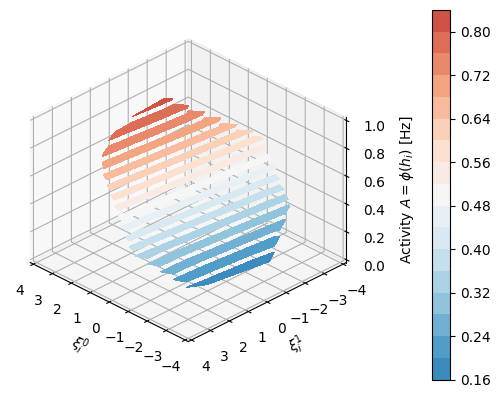

In [50]:
# tricontourf attempt

t = 20
activity = phi(res.y)

plt.close('all')
ax = plt.figure().add_subplot(projection='3d')
ax.set_proj_type('ortho')

# tricontourf has this annoying stepwise behavior
surf = ax.tricontourf(rnn.F[:Nmax, 0], rnn.F[:Nmax, 1], activity[:Nmax, t], cmap='RdBu_r', levels=20, vmin=0, vmax=1)
cbar = fig.colorbar(surf, ax=ax, pad=0.15)

ax.set_zlim((0, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
ax.view_init(azim=180-45)

plt.show(fig)

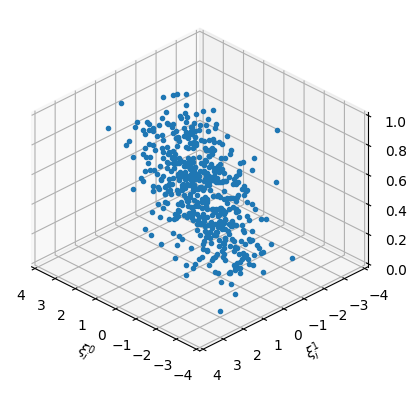

In [31]:
# scatter attempt

t = 20
Nmax = 512
activity = phi(res.y)

plt.close('all')
ax = plt.figure().add_subplot(projection='3d')
ax.set_proj_type('ortho')

ax.plot(rnn.F[:Nmax, 0], rnn.F[:Nmax, 1], activity[:Nmax, t], '.')

ax.set_zlim((0, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
ax.view_init(azim=180-45)

plt.show(fig)

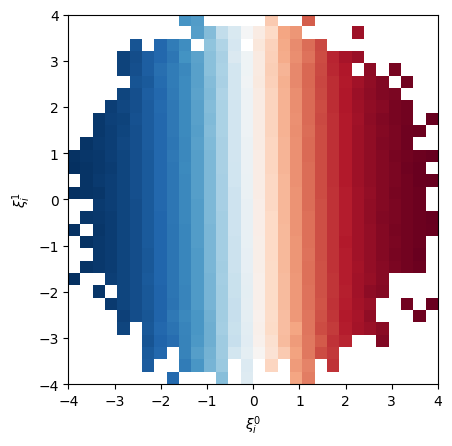

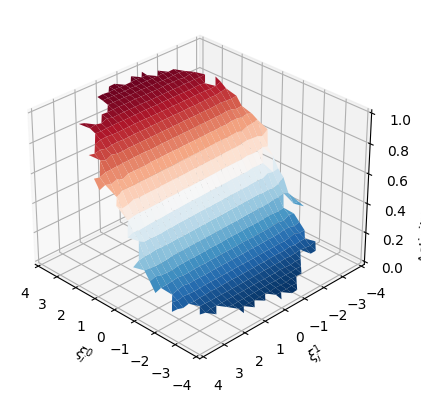

In [48]:
t = 20
# note : when we plot the bins, we have [y, x] indexing, so we need to invert the x and y arguments here
bins = stats.binned_statistic_2d(rnn.F[:, 1], rnn.F[:, 0], activity[:, t], statistic='mean', bins=30, range=((-4, 4), (-4, 4)))

plt.close('all')
fig, ax = plt.subplots()
ax.imshow(bins.statistic, cmap='RdBu_r', extent=(-4, 4, -4, 4))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
plt.show()

# %matplotlib widget
%matplotlib inline
plt.close('all')
xx, yy = np.meshgrid(midpoints(bins.x_edge), midpoints(bins.y_edge))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, bins.statistic, cmap='RdBu_r')
ax.set_zlim((0, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('$\\xi^0_i$')
ax.set_ylabel('$\\xi^1_i$')
ax.set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
ax.view_init(azim=180-45)
plt.show()

### demo plots

In [ ]:
rnn = LowRankRNN(F, G, phi, I_ext)
res = rnn.simulate_h(np.zeros(rnn.N), (0, 40), dt_max=1, progress=True)

simulation time: 100.00%|██████████| t=40.000 of 40 [00:06<00:00]


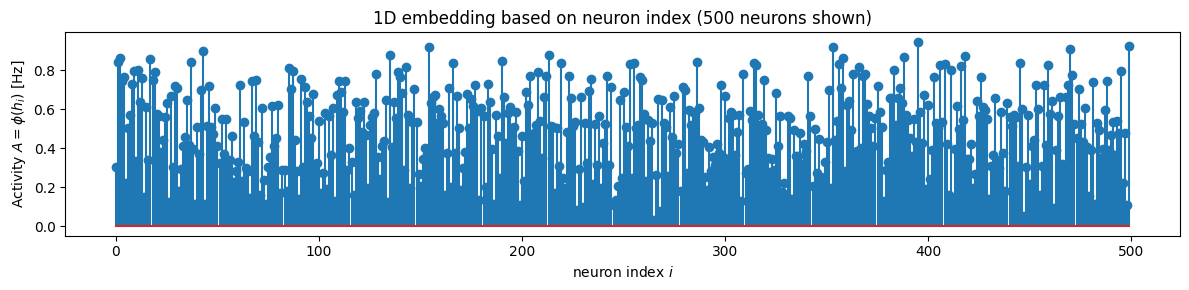

In [ ]:
t = -1
Nmax = 500

plt.close('all')
fig, ax = plt.subplots(tight_layout=True, figsize=(12, 3))

ax.set_title('1D embedding based on neuron index (500 neurons shown)')
ax.stem(np.arange(len(res.y[:Nmax, t])), rnn.phi(res.y[:Nmax, t]))
ax.set_xlabel('neuron index $i$')
ax.set_ylabel('Activity $A = \\phi(h_i)$ [Hz]')

plt.show()

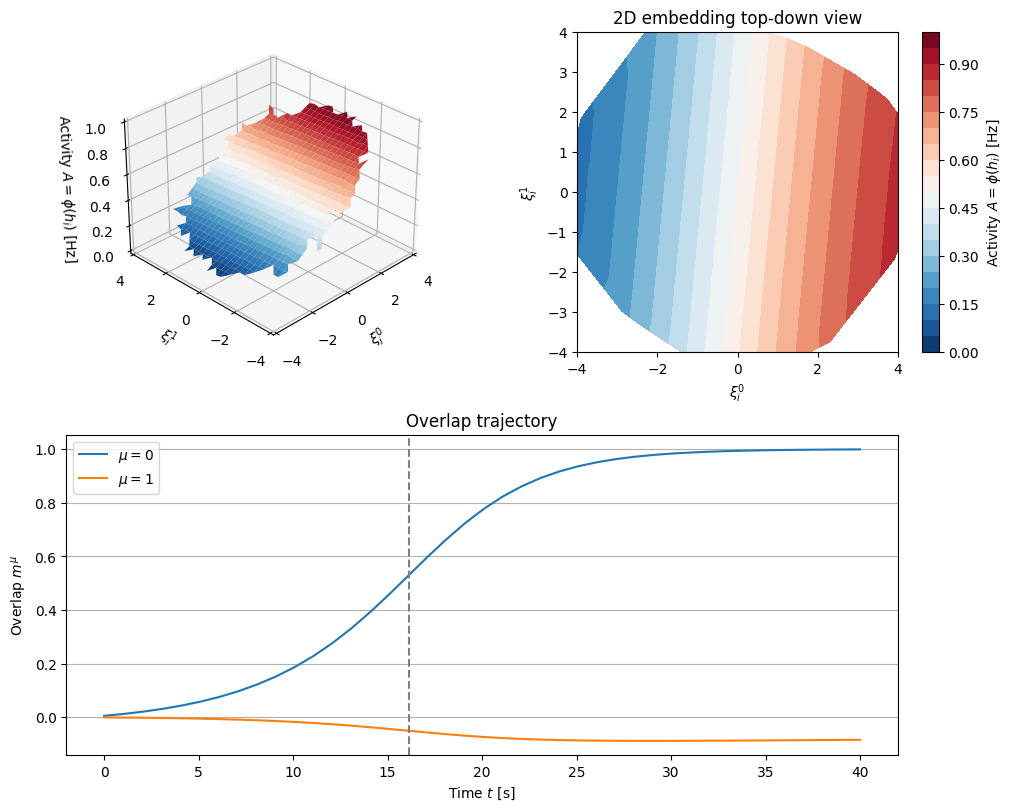

In [55]:
activity = phi(res.y)
idt = 20

plt.close('all')
fig, axes = plt.subplot_mosaic([
	['a','b'],
	['m','m'],
], figsize=(10, 8), constrained_layout=True)

# 2d plotting

contour = axes['b'].tricontourf(rnn.F[:, 0], rnn.F[:, 1], activity[:, idt], levels=np.linspace(0, 1, 20+1), cmap='RdBu_r')
cbar = fig.colorbar(contour, ax=axes['b'], label='Activity $A = \\phi(h_i)$ [Hz]')

axes['b'].set_title('2D embedding top-down view')
axes['b'].set_xlabel('$\\xi^0_i$')
axes['b'].set_ylabel('$\\xi^1_i$')
axes['b'].set_xlim((-4, 4))
axes['b'].set_ylim((-4, 4))
axes['b'].set_aspect('equal')

# 3d plotting

ss = axes['a'].get_subplotspec()
axes['a'].remove()
axes['a'] = fig.add_subplot(ss, projection='3d')  # replace by 3D axis

# note : when we plot the bins, we have [y, x] indexing, so we need to invert the x and y arguments here
bins = stats.binned_statistic_2d(rnn.F[:, 1], rnn.F[:, 0], activity[:, idt], statistic='mean', bins=30, range=((-4, 4), (-4, 4)))
xx, yy = np.meshgrid(midpoints(bins.x_edge), midpoints(bins.y_edge))
surf = axes['a'].plot_surface(xx, yy, bins.statistic, cmap='RdBu_r')

axes['a'].set_zlim((0, 1))
axes['a'].set_xlim((-4, 4))
axes['a'].set_ylim((-4, 4))
axes['a'].set_xlabel('$\\xi^0_i$')
axes['a'].set_ylabel('$\\xi^1_i$')
axes['a'].set_zlabel('Activity $A = \\phi(h_i)$ [Hz]')
axes['a'].view_init(azim=180+45)
# axes['a'].set_title('3D view')

# trajectory

plot_overlap_trajectory(rnn, res, figax=(fig, axes['m']))
axes['m'].axvline(res.t[idt], color='tab:gray', linestyle='--')

plt.show()

### animation attempt (WIP)

In [12]:
rnn = LowRankRNN(F, G, phi, I_ext)
res = rnn.simulate_h(np.zeros(rnn.N), (0, 40), dt_max=1, progress=True)

simulation time: 100.00%|██████████| t=40.000 of 40 [00:12<00:00]


In [13]:
animate2d(rnn, res, 'animations/embedding_d=2_h0=0.mp4')

46it [04:11,  5.47s/it]                        
